# PC-GMM Composites

In [1]:
from importlib import reload
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy as ctp

from climvae.utils import utenso, preproc, eof, utdata, utstats, metric
import climvae.vaeplot as vpl

plt.style.use("../../paper.mplstyle")


In [2]:
# Load weights
weight_month_mean = xr.open_dataset(
    "../../output/reanalysis/pcgmm/pcgmm_weights_mon_mean_sst.nc"
)['p_c_given_x']
gmm_order = weight_month_mean.attrs['gmm_sort']


In [3]:
# Load data
# =======================================================================================
reload(preproc)
vars = ['sst', 'ssh', 'olr']  # , 'ssh', 'olr']
climatology = 'month'
f_sst = "../../data/sst/monthly/sst_era5_monthly_sp_1959-2021_1x1.nc"
stattest = 'ttest'

datapath = {
    'sst': f"../../data/sst/monthly/sst_era5_monthly_sp_1959-2021_1x1.nc",
    'ssh': f"../../data/additional_data/monthly/sea_surface_height_oras5_single_level_gs_2.5_1958_2022.nc",
    't2m': f"../../data/additional_data/monthly/2m_temperature_era5_monthly_sp_1940-2022_2.5x2.5.nc",
    'tp': f"../../data/additional_data/monthly/total_precipitation_era5_monthly_gs_2.5_1959_2021.nc",
    'logtp': f"../../data/additional_data/monthly/log_total_precipitation_era5_monthly_gs_2.5_1959_2021.nc",
    'u10': f"../../data/additional_data/monthly/u10_era5_monthly_sp_gs_2.5_1959_2021.nc",
    'v10': f"../../data/additional_data/monthly/v10_era5_monthly_sp_gs_2.5_1959_2021.nc",
    'sp': f"../../data/additional_data/monthly/surface_pressure_era5_monthly_sp_1959-2021_2.5x2.5.nc",
    'z': f"../../data/additional_data/monthly/geopotential_era5_monthly_500_1959-2021_2.5x2.5.nc",
    'ttr': f"../../data/additional_data/monthly/top_net_thermal_radiation_era5_monthly_sp_1940-2022_2.5x2.5.nc",
    'olr': f"../../data/additional_data/monthly/olr_era5_monthly_sp_1940-2022_2.5x2.5.nc",
    'logolr': f"../../data/additional_data/monthly/log_olr_era5_monthly_sp_1940-2022_2.5x2.5.nc",
}

da4comp_arr = []
for var in vars:
    print(f"Load {var}")
    temp = preproc.process_data(
        datapath[var], vars=[var], antimeridian=False,
        lon_range=[-180, 179], lat_range=[-80, 80],
        grid_step=2.5, climatology=climatology, normalization=None
    )
    temp = temp[f"{var}a"]
    temp['time'] = np.array(temp['time'].data, dtype='datetime64[M]')
    da4comp_arr.append(temp)
ds4comp = xr.merge(da4comp_arr)


Load sst
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Get selected area: lon=[-180, 179], lat=[-80, 80]!
Interpolate grid on res 2.5
Detrend and compute anomalies:
Load ssh
Sort longitudes and latitudes in ascending order, respectively
Process ssh:
Get selected area: lon=[-180, 179], lat=[-80, 80]!
Interpolate grid on res 2.5
Detrend and compute anomalies:
Load olr
Sort longitudes and latitudes in ascending order, respectively
Process olr:
Get selected area: lon=[-180, 179], lat=[-80, 80]!
Interpolate grid on res 2.5
Detrend and compute anomalies:


## Probabilistic weighted composites

In [4]:
# Parameters
n_samples_time = 12
n_samples_mean = 100
alpha = 0.05
null_hypothesis = 'neutral'
stattest = 'pos'
multiple_testing='dunn'

In [5]:
# Weighted composites
composites_prob, mask_prob, samples_null_prob, pvals_prob = utenso.get_weighted_composites(
    ds4comp, f_sst, weight_month_mean, null_hypothesis=null_hypothesis,
    stattest=stattest, n_samples_mean=n_samples_mean, n_samples_time=n_samples_time, alpha=alpha,
    multiple_testing=multiple_testing, serial_data=False
)


Sort longitudes and latitudes in ascending order, respectively
Len of null-times: 16
Compute mean and stat-test for ssta
Percentile of score for c=1


100%|██████████| 9360/9360 [00:07<00:00, 1307.46it/s]


Percentile of score for c=2


100%|██████████| 9360/9360 [00:07<00:00, 1182.01it/s]


Percentile of score for c=3


100%|██████████| 9360/9360 [00:07<00:00, 1209.22it/s]


Percentile of score for c=4


100%|██████████| 9360/9360 [00:07<00:00, 1206.51it/s]


Percentile of score for c=5


100%|██████████| 9360/9360 [00:07<00:00, 1184.60it/s]


Compute mean and stat-test for ssha
Percentile of score for c=1


100%|██████████| 9360/9360 [00:07<00:00, 1183.40it/s]


Percentile of score for c=2


100%|██████████| 9360/9360 [00:07<00:00, 1173.12it/s]


Percentile of score for c=3


100%|██████████| 9360/9360 [00:07<00:00, 1191.57it/s]


Percentile of score for c=4


100%|██████████| 9360/9360 [00:07<00:00, 1226.90it/s]


Percentile of score for c=5


100%|██████████| 9360/9360 [00:07<00:00, 1207.46it/s]


Compute mean and stat-test for olra
Percentile of score for c=1


100%|██████████| 9360/9360 [00:07<00:00, 1200.51it/s]


Percentile of score for c=2


100%|██████████| 9360/9360 [00:07<00:00, 1215.30it/s]


Percentile of score for c=3


100%|██████████| 9360/9360 [00:07<00:00, 1202.82it/s]


Percentile of score for c=4


100%|██████████| 9360/9360 [00:07<00:00, 1174.71it/s]


Percentile of score for c=5


100%|██████████| 9360/9360 [00:08<00:00, 1093.64it/s]


/tmp/ipykernel_16073/3324620833.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../output/reanalysis/pcgmm/stattest_analysis/"
/home/jakob/Software/mambaforge/envs/vaeenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


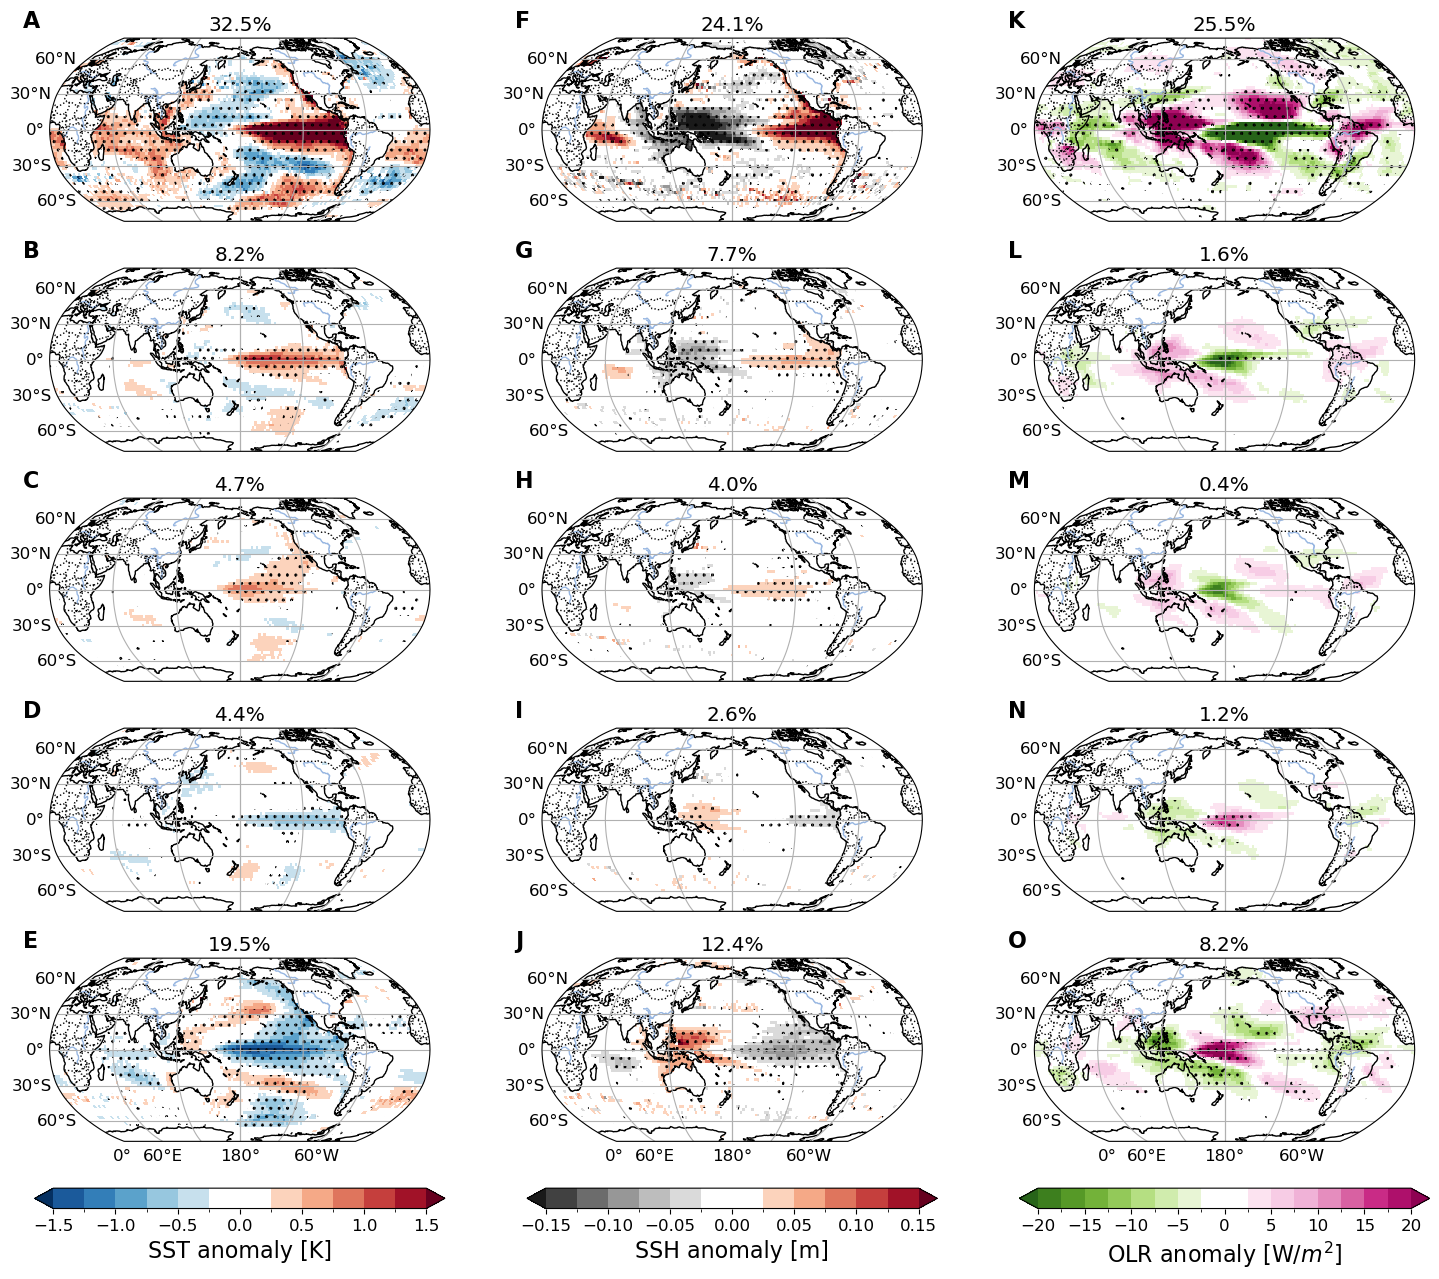

In [6]:
# Plot weighted composites
# ===============================================
reload(vpl)
plotspec = {
    'ssta': dict(cmap='RdBu_r', vmin=-1.5, vmax=1.5, step=.25, label='SST anomaly [K]'),
    'ssha': dict(cmap='RdGy_r', vmin=-.15, vmax=.15, step=.025, label='SSH anomaly [m]'),
    't2ma': dict(cmap='RdBu_r', vmin=None, vmax=None, step=.25, label='2m temperature anomaly'),
    'tpa':  dict(cmap='PiYG_r', vmin=-.5e-2, vmax=.5e-2, step=.25, label='precipitation'),
    'logtpa': dict(cmap='PiYG_r', vmin=-.5e-2, vmax=.5e-2, step=.25, label='log-precipitation'),
    'spa':  dict(cmap='RdBu_r', vmin=-500, vmax=500, step=100, label='surface pressure'),
    'za':   dict(cmap='PRGn_r', vmin=-500, vmax=500, step=100, label='500hPa geopot. height'),
    'ttra': dict(cmap='PiYG_r', vmin=-1e6, vmax=1e6, step=.25e6, label='TTR'),
    'olra': dict(cmap='PiYG_r', vmin=-20, vmax=20, step=2.5, label=r'OLR anomaly [W/$m^2$]'),
    'logolra': dict(cmap='PiYG_r', vmin=-.1, vmax=.1, step=.02, label='log(OLRA)')
}
n_columns = len(composites_prob.data_vars)
n_rows = len(composites_prob['classes'])
height_ratios = [9]*(n_rows)
height_ratios.append(1)
fig = plt.figure(figsize=(n_columns*6, n_rows*3 + 0.2))
gs = fig.add_gridspec(n_rows + 1, n_columns,
                      height_ratios=height_ratios,
                      hspace=0.3, wspace=0.2)
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)

axs = []
for j in range(n_columns):
    for i in range(n_rows):
        idx = gmm_order[i] + 1
        var = list(composites_prob.data_vars)[j]
        comp = composites_prob[var].sel(classes=idx)
        mask = mask_prob[var].sel(classes=idx)
        ax = fig.add_subplot(gs[i, j], projection=proj)

        im = vpl.plot_map(comp, central_longitude=0, ax=ax,
                          bar='discrete', add_bar=False,
                          cmap=plotspec[var]['cmap'],
                          vmin=plotspec[var]['vmin'], vmax=plotspec[var]['vmax'],
                          step=plotspec[var]['step'], centercolor='#FFFFFF')
        vpl.significance_mask(mask, ax=ax, hatch="..",
                              central_longitude=0)
        # Remove labels
        im['gl'].top_labels = False
        im['gl'].right_labels = False
        if i == n_rows-1:
            im['gl'].bottom_labels = True
        else:
            im['gl'].bottom_labels = False
        # Set number of significant points as title
        n_nan = np.count_nonzero(np.isnan(mask.data.flatten()))
        ratio_significant = np.count_nonzero(mask.data.flatten()) / (len(mask.data.flatten()) - n_nan) * 100
        ax.set_title(f"{ratio_significant:.1f}%")
        axs.append(ax)

    # Shared colorbar
    ax = fig.add_subplot(gs[-1, j])
    cbar = plt.colorbar(im['im'], orientation='horizontal', shrink=0.3,
                        cax=ax, extend='both')
    cbar.set_label(f"{plotspec[var]['label']}", size=16)

_ = vpl.enumerate_subplots(np.array(axs).T, pos_x=-
                           0.07, pos_y=1.06, fontsize=16)

# fig.suptitle(
#     f"Weighted composites ('{stattest}'-test, n={n_samples_mean}, t={n_samples_time})")
plt.savefig("../../output/reanalysis/pcgmm/stattest_analysis/"
            + f"weighted_composites_{stattest}-test_null-{null_hypothesis}_alpha-{alpha}"
            + f"_n-{n_samples_mean}_t-{n_samples_time}_multitest_{multiple_testing}.png",
            dpi=300, bbox_inches='tight')


## Unweighted composites

In [7]:
# Unweighted composites
reload(utenso)
composites_unweight, mask_unweight, composites_null, samples_null_unweight, pvalues_unweight = utenso.get_unweighted_composites(
    ds4comp, f_sst, stattest=stattest, null_hypothesis=null_hypothesis,
    n_samples_mean=n_samples_mean, n_samples_time=n_samples_time, alpha=alpha,
    serial_data=False, multiple_testing=multiple_testing
)


Sort longitudes and latitudes in ascending order, respectively
Num of datapoints Nino_EP: 24
Percentile of score for Nino_EP


100%|██████████| 9360/9360 [00:08<00:00, 1109.03it/s]


Num of datapoints Nino_CP: 27
Percentile of score for Nino_CP


100%|██████████| 9360/9360 [00:08<00:00, 1106.24it/s]


Num of datapoints Nina_EP: 33
Percentile of score for Nina_EP


100%|██████████| 9360/9360 [00:09<00:00, 1008.65it/s]


Num of datapoints Nina_CP: 27
Percentile of score for Nina_CP


100%|██████████| 9360/9360 [00:08<00:00, 1110.53it/s]


Num of datapoints Nino_EP: 24
Percentile of score for Nino_EP


100%|██████████| 9360/9360 [00:08<00:00, 1108.43it/s]


Num of datapoints Nino_CP: 27
Percentile of score for Nino_CP


100%|██████████| 9360/9360 [00:08<00:00, 1114.86it/s]


Num of datapoints Nina_EP: 33
Percentile of score for Nina_EP


100%|██████████| 9360/9360 [00:08<00:00, 1125.93it/s]


Num of datapoints Nina_CP: 27
Percentile of score for Nina_CP


100%|██████████| 9360/9360 [00:08<00:00, 1144.45it/s]


Num of datapoints Nino_EP: 24
Percentile of score for Nino_EP


100%|██████████| 9360/9360 [00:08<00:00, 1118.19it/s]


Num of datapoints Nino_CP: 27
Percentile of score for Nino_CP


100%|██████████| 9360/9360 [00:08<00:00, 1145.26it/s]


Num of datapoints Nina_EP: 33
Percentile of score for Nina_EP


100%|██████████| 9360/9360 [00:08<00:00, 1131.64it/s]


Num of datapoints Nina_CP: 27
Percentile of score for Nina_CP


100%|██████████| 9360/9360 [00:08<00:00, 1123.35it/s]


/tmp/ipykernel_16073/2165895367.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../output/reanalysis/pcgmm/stattest_analysis/"
/home/jakob/Software/mambaforge/envs/vaeenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


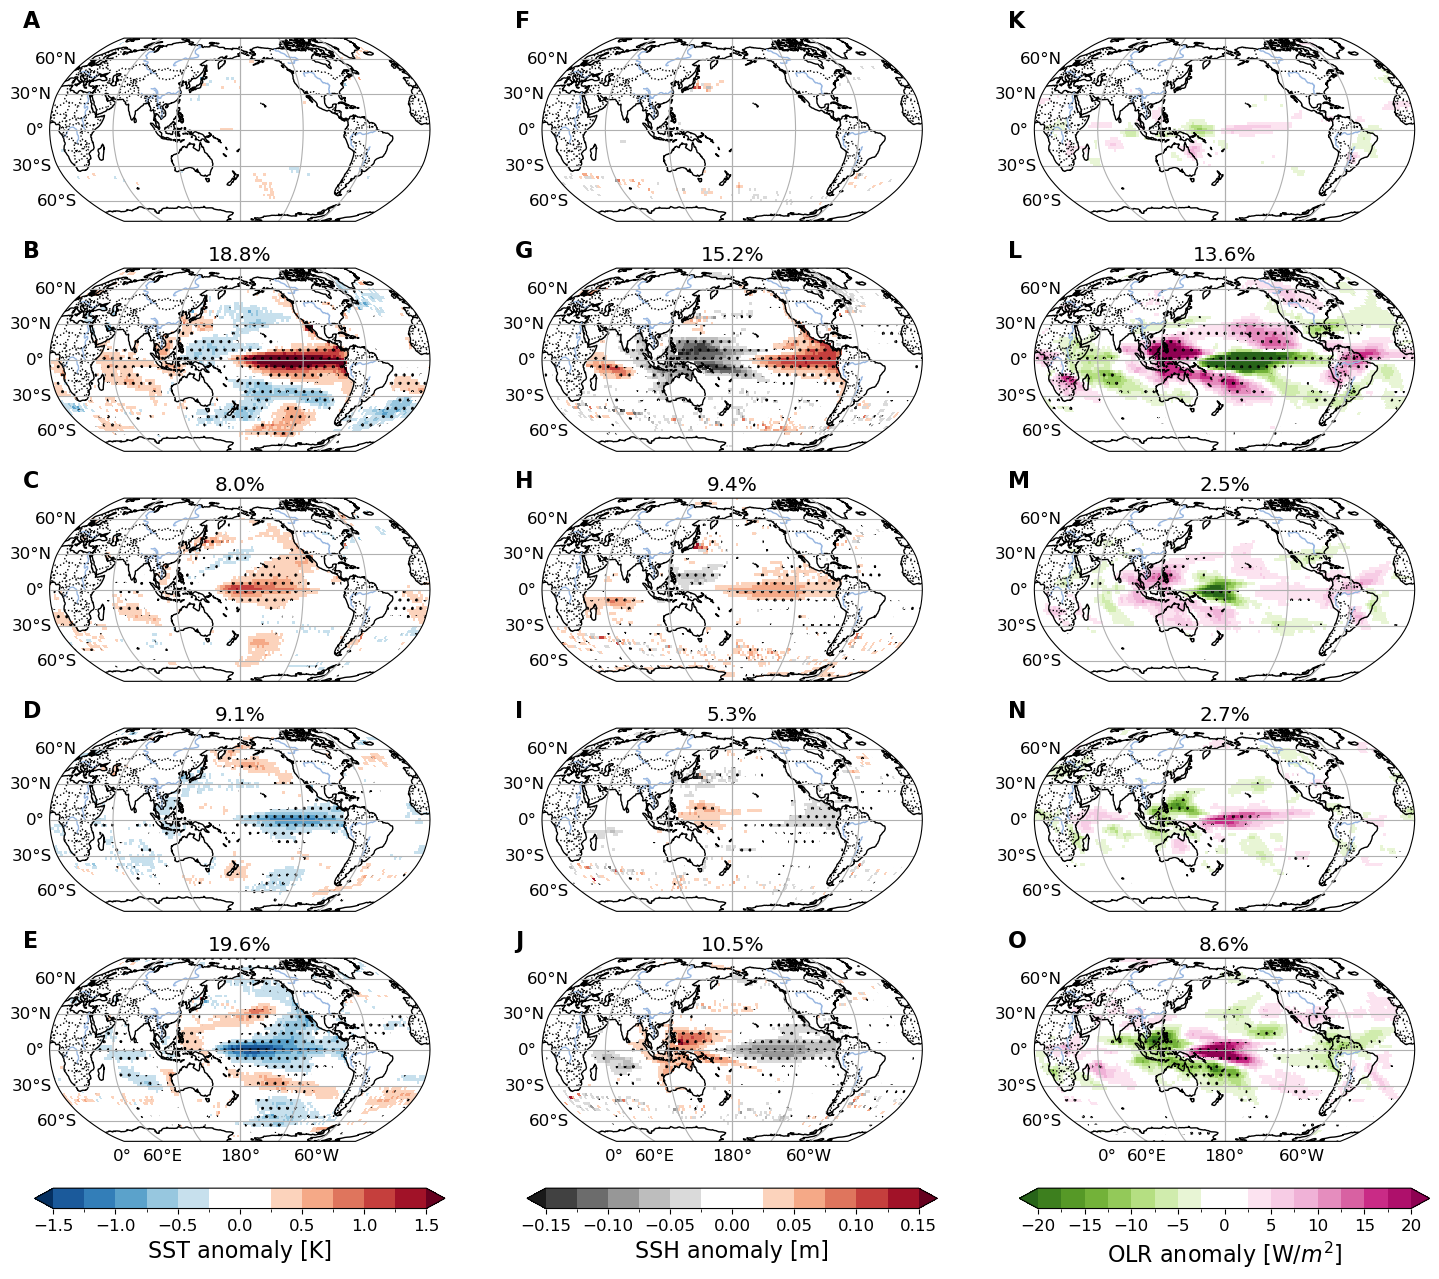

In [8]:
# Plot unweighted composites
n_columns = len(composites_unweight.data_vars)
n_rows = len(composites_unweight['classes']) + 1
height_ratios = [9]*(n_rows)
height_ratios.append(1)
fig = plt.figure(figsize=(n_columns*6, n_rows*3 + 0.2))
gs = fig.add_gridspec(n_rows+1, n_columns,
                      height_ratios=height_ratios,
                      hspace=0.3, wspace=0.2)
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)

axs = []
for j in range(n_columns):
    var = list(composites_unweight.data_vars)[j]

    # Neutral composites
    ax = fig.add_subplot(gs[0, j], projection=proj)
    im = vpl.plot_map(composites_null[var], central_longitude=0, ax=ax,
                      bar='discrete', add_bar=False,
                      cmap=plotspec[var]['cmap'],
                      vmin=plotspec[var]['vmin'], vmax=plotspec[var]['vmax'],
                      step=plotspec[var]['step'], centercolor='#FFFFFF')
#    ax.set_title(f"Neutral")
    axs.append(ax)
    im['gl'].top_labels = False
    im['gl'].right_labels = False
    im['gl'].bottom_labels = False

    # ENSO flavor composites
    for i in range(len(composites_unweight['classes'])):
        comp = composites_unweight[var].isel(classes=i)
        mask = mask_unweight[var].isel(classes=i)
        ax = fig.add_subplot(gs[i+1, j], projection=proj)

        im = vpl.plot_map(comp, central_longitude=0, ax=ax,
                          bar='discrete', add_bar=False,
                          cmap=plotspec[var]['cmap'],
                          vmin=plotspec[var]['vmin'], vmax=plotspec[var]['vmax'],
                          step=plotspec[var]['step'], centercolor='#FFFFFF')
        vpl.significance_mask(mask, ax=ax,
                              central_longitude=0)
        # Remove labels
        im['gl'].top_labels = False
        im['gl'].right_labels = False
        if i+1 == n_rows-1:
            im['gl'].bottom_labels = True
        else:
            im['gl'].bottom_labels = False

        # Set number of significant points as title
        n_nan = np.count_nonzero(np.isnan(mask.data.flatten()))
        ratio_significant = np.count_nonzero(mask.data.flatten()) / (len(mask.data.flatten()) - n_nan) * 100
        ax.set_title(f"{ratio_significant:.1f}%")
        axs.append(ax)

    # Shared colorbar
    ax = fig.add_subplot(gs[-1, j])
    cbar = plt.colorbar(im['im'], orientation='horizontal', shrink=0.3,
                        cax=ax, extend='both')
    cbar.set_label(f"{plotspec[var]['label']}", size=16)

_ = vpl.enumerate_subplots(np.array(axs).T, pos_x=-0.07, pos_y=1.06, fontsize=16)

#fig.suptitle(
#    f"Unweighted composites ('{stattest}'-test, n={n_samples_mean}, t={n_samples_time})")
plt.savefig("../../output/reanalysis/pcgmm/stattest_analysis/"
            + f"unweighted_composites_{stattest}-test_null-{null_hypothesis}_alpha-{alpha}"
            + f"_n-{n_samples_mean}_t-{n_samples_time}_multitest-{multiple_testing}.png",
            dpi=300, bbox_inches='tight')


## Plot histograms

In [9]:
plotspec = {
    'ssta': dict(cmap='RdBu_r', vmin=-1.5, vmax=1.5, eps=.25, label='SST anomaly [K]'),
    'ssha': dict(cmap='RdGy_r', vmin=-.15, vmax=.15, eps=.025, label='SSH anomaly [m]'),
    't2ma': dict(cmap='RdBu_r', vmin=None, vmax=None, eps=.25, label='2m temperature anomaly'),
    'tpa':  dict(cmap='PiYG_r', vmin=-.5e-2, vmax=.5e-2, eps=.25, label='precipitation'),
    'logtpa': dict(cmap='PiYG_r', vmin=-.5e-2, vmax=.5e-2, eps=.25, label='log-precipitation'),
    'spa':  dict(cmap='RdBu_r', vmin=-500, vmax=500, eps=100, label='surface pressure'),
    'za':   dict(cmap='PRGn_r', vmin=-500, vmax=500, eps=100, label='500hPa geopot. height'),
    'ttra': dict(cmap='PiYG_r', vmin=-1e6, vmax=1e6, eps=.25e6, label='TTR'),
    'olra': dict(cmap='PiYG_r', vmin=-20, vmax=20, eps=2.5, label=r'OLR anomaly [W/$m^2$]'),
    'logolra': dict(cmap='PiYG_r', vmin=-.1, vmax=.1, eps=.02, label='log(OLRA)')
}

TypeError: plot_map() got an unexpected keyword argument 'eps'

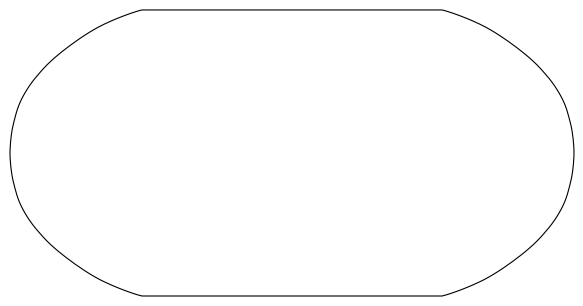

In [10]:
reload(vpl)
idx = 3
var = 'olra'
lat = 0.0
lon = 178 
mean = composites_unweight[var].isel(classes=idx)
mask = mask_unweight[var].isel(classes=idx)
samples_null = samples_null_unweight[var]

fig = plt.figure(figsize=(6,7))

central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)
ax1 = fig.add_subplot(211, projection=proj)
im = vpl.plot_map(mean,
                  ax=ax1, central_longitude=0, 
                  bar='discrete', add_bar=False,
                  cmap=plotspec[var]['cmap'],
                  vmin=plotspec[var]['vmin'], vmax=plotspec[var]['vmax'],
                  eps=plotspec[var]['step'], centercolor='#FFFFFF')
vpl.significance_mask(mask, ax=ax1, hatch='..',
                      central_longitude=0)

ax1.scatter(lon, lat, transform=ctp.crs.PlateCarree(),
           marker='*', color='b', s=200)
ax1.set_title(f"{mean['classes'].data}")
# Hist
ax2 = fig.add_subplot(212)
ax2.axvline(mean.sel(lon=lon, lat=lat, method='nearest'), color='k', label='mean')
ax2.hist(samples_null.sel(lon=lon, lat=lat, method='nearest').data,
        bins='auto', density=True, alpha=0.5, label='null')
ax2.legend()
ax2.set_title(f"PoS: {pvals_prob[var].isel(classes=idx).sel(lon=lon, lat=lat, method='nearest').data:.2f}"+
      f", significance: {mask.sel(lon=lon, lat=lat, method='nearest').data}")


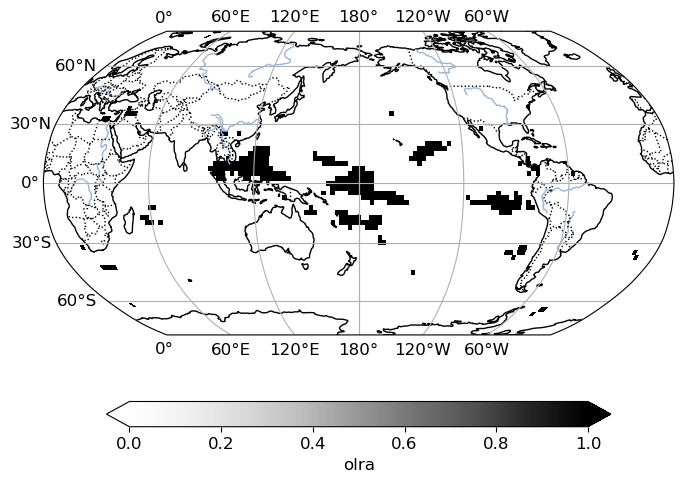

In [ ]:
fig = plt.figure()
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)
ax = fig.add_subplot(111, projection=proj)
im = vpl.plot_map(mask, cmap='Greys', vmin=0, vmax=1, eps=.05,
                  bar='continuous', ax=ax, central_longitude=0)

In [ ]:
n_nan = np.count_nonzero(np.isnan(mask.data.flatten()))
np.count_nonzero(mask.data.flatten()) / (len(mask.data.flatten()) - n_nan) * 100

3.0876068376068377

In [ ]:
X = samples_null.sel(lon=lon, lat=lat, method='nearest').data
y = mean.sel(lon=lon, lat=lat, method='nearest').data
print(f"Mean: {y}")
print(f"Q(.95):{np.quantile(X, 0.95)}")

(100 - stats.percentileofscore(X, y, kind='mean', nan_policy='propagate'))/100


Mean: 24.213399786000323
Q(.95):14.601077064767136


NameError: name 'stats' is not defined

In [ ]:
fig = plt.figure()
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)
ax = fig.add_subplot(111, projection=proj)
im = vpl.plot_map(mask, cmap='Greys', vmin=0, vmax=1, eps=.05,
                  bar='continuous', ax=ax, central_longitude=0)
vpl.significance_mask(mask, ax=ax, 
                      central_longitude=0)

In [ ]:
pvals = pvals_prob[var].isel(classes=idx) 
#pvals = xr.where(pvals_prob[var].isel(classes=idx) < alpha, 1, 0)
fig = plt.figure()
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)
ax = fig.add_subplot(111, projection=proj)
im = vpl.plot_map(pvals, cmap='Greys', vmin=0, vmax=.5, eps=.05,
                  bar='discrete', ax=ax, central_longitude=0)
vpl.significance_mask(mask, ax=ax, 
                      central_longitude=0)